# <font color = 'pickle'>**Handling Long Sequence- Chunking** </font>

# <font color = 'pickle'>**Binary Classification - Sentiment Analysis with the IMDB Dataset** </font>







## Outline
1. **Setting up the Environment**: Installing necessary libraries and setting up paths.
2. **Exploring and Understanding IMDB Dataset**: Understanding the structure and content of the dataset.

3. **Data Preprocessing**: Techniques to prepare the data for training, including handling different data splits and tokenization
4. **Training the Model**: Feeding data and adjusting weights.
5. **Inference**: Evaluate model on test set and making predictions.



# <font color = 'pickle'> **Setting up the Environment** </font>

In [1]:
from pathlib import Path
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount("/content/drive")
    !pip install datasets transformers evaluate wandb accelerate -U -qq
    base_folder = Path("/content/drive/MyDrive/data")
else:
    base_folder = Path("/home/harpreet/Insync/google_drive_shaannoor/data")


Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 32.0 MB/s eta 0:00

# <font color = 'pickle'> **Exploring and Understanding Dataset**

## <font color = 'pickle'> **Load Data set**
    


In [2]:
from datasets import load_dataset, DatasetDict

In [3]:
imdb_dataset = load_dataset("imdb")

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

## <font color = 'pickle'> **Understanding your data**

In [4]:
print(imdb_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


## <font color = 'pickle'> **Understanding the datatype of columns**


In [5]:
imdb_dataset['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

## <font color = 'pickle'> **Acess indivdual element** </font>
 The dataset behaves like an Python array or list. We can use the familiar indexing/slicing methods to access individual elements.

In [6]:
# get the first example of the dataset
imdb_dataset['train'][0]


{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [7]:
# get label of last ten examples
imdb_dataset['train']['label'][-10:]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## <font color = 'pickle'> **Exploratory Data Analysis (EDA)**

### <font color = 'pickle'> **Change dataset format to Pandas**  </font>
We will convert the datasets to Pandas DataFrames for visualization and Exploratory Data Analysis (EDA) because Pandas provides a wide range of tools and functions that simplify data manipulation, aggregation, and visualization, making it an ideal choice for these tasks

In [8]:
# this will convert all the splits into Pandas dataframe
imdb_dataset.set_format(type='pandas')

In [9]:
# get all rows from tarining split
df_train = imdb_dataset['train'][:]

In [10]:
df_train.head()


,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


### <font color = 'pickle'> **Visualize distribution of class labels** </font>
It is important to undetrstand the distribution of the class labels to check if there is any imbalance among the categories.

<Axes: >

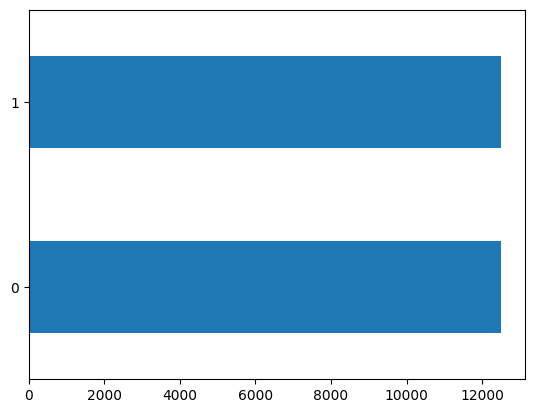

In [12]:
# check distribution of class labels in training dataset
df_train['label'].value_counts(ascending=True).plot.barh()


### <font color = 'pickle'> **Check length of the reviews** </font>


In [13]:
df_train['words_per_review'] = df_train['text'].str.split().apply(len)


In [14]:
df_train.head()

,text,label,words_per_review
0,I rented I AM CURIOUS-YELLOW from my video sto...,0,288
1,"""I Am Curious: Yellow"" is a risible and preten...",0,214
2,If only to avoid making this type of film in t...,0,93
3,This film was probably inspired by Godard's Ma...,0,118
4,"Oh, brother...after hearing about this ridicul...",0,311


#### <font color = 'pickle'> **Plot the distribution of review length** </font>

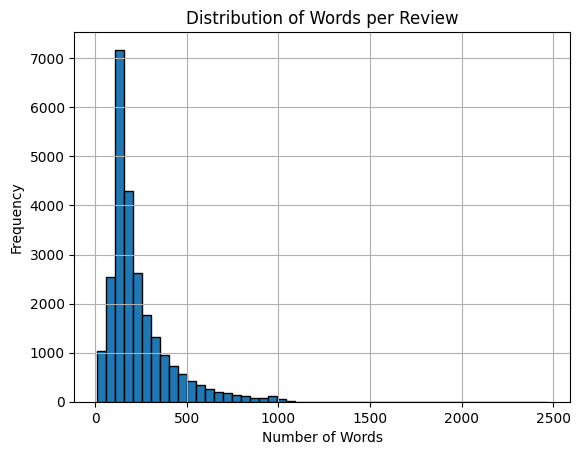

In [15]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'words_per_review' column
df_train['words_per_review'].hist(bins=50, edgecolor='black')

# Adding labels and a title for clarity
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Words per Review')

# Display the plot
plt.show()


In [16]:
# The model we are going to use has token (subwords) limit of 512.
# Let us check how many reviews has more than 500 words

count = (df_train['words_per_review'] > 400).sum()
print(f"Number of reviews with more than 400 words: {count}")


Number of reviews with more than 400 words: 3353


### <font color = 'pickle'> **Reset dataset format** </font>


In [17]:
imdb_dataset.reset_format()

In [18]:
imdb_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

# <font color = 'pickle'> **Data Pre-processing**</font>

## <font color = 'pickle'> **Filtering Larger Reviews**</font>

In [19]:
# Filter samples with more than 400 words
def filter_long_samples(example):
    return len(example['text'].split()) > 400

imdb_dataset_long = imdb_dataset.filter(filter_long_samples)

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [20]:
imdb_dataset_long

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3353
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3131
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 6642
    })
})

### <font color = 'pickle'> **Extract Splits**

In [21]:
train_split = imdb_dataset_long['train']
test_validation_dataset = imdb_dataset_long["test"]

In [22]:
train_split

Dataset({
    features: ['text', 'label'],
    num_rows: 3353
})

### <font color = 'pickle'> **Create futher subdivions of the splits** </font>

In [23]:
# Split the test set into test and validation sets
test_val_splits = imdb_dataset_long["test"].train_test_split(
    test_size=0.4, seed=42)  # 60% for validation, 40% for test

# Extract the test and validation splits
valid_split = test_val_splits["train"]
test_split = test_val_splits["test"]


In [24]:
valid_split

Dataset({
    features: ['text', 'label'],
    num_rows: 1878
})

### <font color = 'pickle'> **Create subset for experimentation** </font>

In [25]:
train_split_small = train_split.shuffle(seed=42).select(range(10))
val_split_small = valid_split.shuffle(seed=42).select(range(10))
test_split_small = test_split.shuffle(seed=42).select(range(10))


### <font color = 'pickle'> **Combine splits**</font>



In [26]:
train_val = DatasetDict(
    {"train": train_split, "valid": valid_split})
train_val_small = DatasetDict(
    {"train": train_split_small, "valid": val_split_small})


In [27]:
train_val

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 3353
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 1878
    })
})

In [28]:
train_val_small

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10
    })
    valid: Dataset({
        features: ['text', 'label'],
        num_rows: 10
    })
})

In [29]:
train_val.set_format(type='pandas')

In [30]:
df_train = train_val['train'][:]

<Axes: >

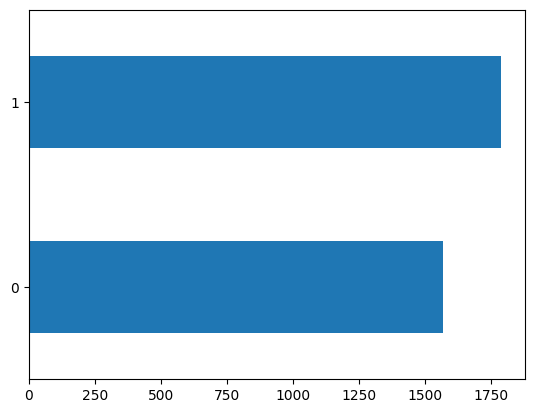

In [31]:
# check ditsribution of class labels in training dataset
df_train['label'].value_counts(ascending=True).plot.barh()

In [32]:
# check distribution of text length
df_train['words_per_review'] = df_train['text'].str.split().apply(len)

<Axes: >

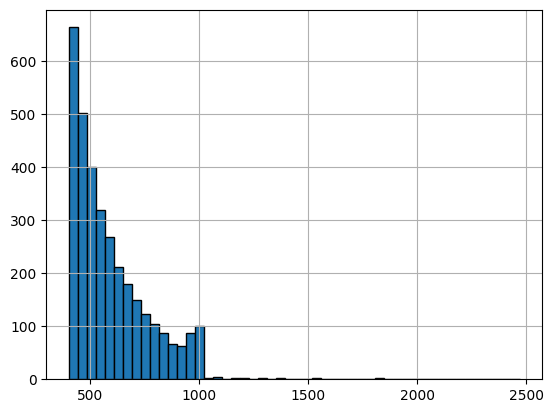

In [33]:
# Plot a histogram of the 'words_per_review' column
df_train['words_per_review'].hist(bins=50, edgecolor='black')

In [34]:
count = (df_train['words_per_review'] > 400).sum()
print(f"Number of reviews with more than 400 words: {count}")

Number of reviews with more than 400 words: 3353


In [35]:
count = (df_train['words_per_review'] < 400).sum()
print(f"Number of reviews with more than 400 words: {count}")

Number of reviews with more than 400 words: 0


In [36]:
train_val.reset_format()

## <font color = 'pickle'> **Tokenization**</font>

###  <font color = 'pickle'> **Load pre-trained Tokenizer** </font>

In [37]:
from transformers import AutoTokenizer
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)


###  <font color = 'pickle'> **Understanding pre-trained Tokenizer**
We will now understand how the tokenizer work by feeding one simple example.

In [38]:
text = ["Tokenization is the process of splitting sequence to tokens",
        "I like BUAN6482"]

In [39]:
# get the vocab size
print(f'Pretrained tokenizer vocab size {tokenizer.vocab_size}')

Pretrained tokenizer vocab size 30522


- <font color = 'indianblue'>The vocab size for the tokenizer for bert-base-uncased model is 30522.

In [40]:
encoded_text = tokenizer(
    text, padding=True, truncation=False, return_tensors='pt')

In [41]:
encoded_text


{'input_ids': tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997, 14541,  5537,  2000,
         19204,  2015,   102],
        [  101,  1045,  2066, 20934,  2319, 21084,  2620,  2475,   102,     0,
             0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]])}

In [42]:
tokens_first_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[0])
tokens_second_sentence = tokenizer.convert_ids_to_tokens(
    encoded_text.input_ids[1])

print(tokens_first_sentence)
print(tokens_second_sentence)


['[CLS]', 'token', '##ization', 'is', 'the', 'process', 'of', 'splitting', 'sequence', 'to', 'token', '##s', '[SEP]']
['[CLS]', 'i', 'like', 'bu', '##an', '##64', '##8', '##2', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [43]:
tokenizer.convert_tokens_to_string(tokens_first_sentence)

'[CLS] tokenization is the process of splitting sequence to tokens [SEP]'

In [44]:
tokenizer.convert_tokens_to_string(tokens_second_sentence)

'[CLS] i like buan6482 [SEP] [PAD] [PAD] [PAD] [PAD]'

##  <font color = 'pickle'> **Create Custom_Collate function**

In [45]:
train_val['train']['text'][0]

'Who are these "They"- the actors? the filmmakers? Certainly couldn\'t be the audience- this is among the most air-puffed productions in existence. It\'s the kind of movie that looks like it was a lot of fun to shoot\x97 TOO much fun, nobody is getting any actual work done, and that almost always makes for a movie that\'s no fun to watch.<br /><br />Ritter dons glasses so as to hammer home his character\'s status as a sort of doppleganger of the bespectacled Bogdanovich; the scenes with the breezy Ms. Stratten are sweet, but have an embarrassing, look-guys-I\'m-dating-the-prom-queen feel to them. Ben Gazzara sports his usual cat\'s-got-canary grin in a futile attempt to elevate the meager plot, which requires him to pursue Audrey Hepburn with all the interest of a narcoleptic at an insomnia clinic. In the meantime, the budding couple\'s respective children (nepotism alert: Bogdanovich\'s daughters) spew cute and pick up some fairly disturbing pointers on \'love\' while observing their 

In [46]:
from datasets import Dataset

texts = [{"text": "Tokenization is the process of splitting sequence to tokens. It's one of the fundamental tasks in natural language processing. However, there are various methods to achieve tokenization in different scenarios.", "label": 1},
         {"text": "I like BUAN6482", "label": 0},
         {"text": "Neural networks using attention mechanisms to process sequences, revolutionizing natural language processing tasks", "label": 0}]

# Convert list of dictionaries to dictionary of lists
data = {
    "text": [item["text"] for item in texts],
    "label": [item["label"] for item in texts]
}

dataset_dummy = Dataset.from_dict(data)

print(dataset_dummy)



Dataset({
    features: ['text', 'label'],
    num_rows: 3
})


In [47]:
dataset_dummy['text'][0]

"Tokenization is the process of splitting sequence to tokens. It's one of the fundamental tasks in natural language processing. However, there are various methods to achieve tokenization in different scenarios."

In [48]:
tokenized_outputs_dummy = tokenizer(dataset_dummy['text'],
                        padding='longest',
                        truncation=True,
                        return_tensors='pt',
                        max_length=10,
                        return_overflowing_tokens=True,
                        stride=3)

In [49]:
tokenized_outputs_dummy

{'input_ids': tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997, 14541,  5537,   102],
        [  101,  1997, 14541,  5537,  2000, 19204,  2015,  1012,  2009,   102],
        [  101,  2015,  1012,  2009,  1005,  1055,  2028,  1997,  1996,   102],
        [  101,  2028,  1997,  1996,  8050,  8518,  1999,  3019,  2653,   102],
        [  101,  1999,  3019,  2653,  6364,  1012,  2174,  1010,  2045,   102],
        [  101,  2174,  1010,  2045,  2024,  2536,  4725,  2000,  6162,   102],
        [  101,  4725,  2000,  6162, 19204,  3989,  1999,  2367, 16820,   102],
        [  101,  1999,  2367, 16820,  1012,   102,     0,     0,     0,     0],
        [  101,  1045,  2066, 20934,  2319, 21084,  2620,  2475,   102,     0],
        [  101, 15756,  6125,  2478,  3086, 10595,  2000,  2832, 10071,   102],
        [  101,  2000,  2832, 10071,  1010,  4329,  6026,  3019,  2653,   102],
        [  101,  6026,  3019,  2653,  6364,  8518,   102,     0,     0,     0]]), 'token_type_ids': tensor

In [50]:
tokenized_outputs_dummy['input_ids']

tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997, 14541,  5537,   102],
        [  101,  1997, 14541,  5537,  2000, 19204,  2015,  1012,  2009,   102],
        [  101,  2015,  1012,  2009,  1005,  1055,  2028,  1997,  1996,   102],
        [  101,  2028,  1997,  1996,  8050,  8518,  1999,  3019,  2653,   102],
        [  101,  1999,  3019,  2653,  6364,  1012,  2174,  1010,  2045,   102],
        [  101,  2174,  1010,  2045,  2024,  2536,  4725,  2000,  6162,   102],
        [  101,  4725,  2000,  6162, 19204,  3989,  1999,  2367, 16820,   102],
        [  101,  1999,  2367, 16820,  1012,   102,     0,     0,     0,     0],
        [  101,  1045,  2066, 20934,  2319, 21084,  2620,  2475,   102,     0],
        [  101, 15756,  6125,  2478,  3086, 10595,  2000,  2832, 10071,   102],
        [  101,  2000,  2832, 10071,  1010,  4329,  6026,  3019,  2653,   102],
        [  101,  6026,  3019,  2653,  6364,  8518,   102,     0,     0,     0]])

In [51]:
for chunk in tokenized_outputs_dummy['input_ids']:
    print(f'\n{tokenizer.convert_ids_to_tokens(chunk)}', end = ' ')


['[CLS]', 'token', '##ization', 'is', 'the', 'process', 'of', 'splitting', 'sequence', '[SEP]'] 
['[CLS]', 'of', 'splitting', 'sequence', 'to', 'token', '##s', '.', 'it', '[SEP]'] 
['[CLS]', '##s', '.', 'it', "'", 's', 'one', 'of', 'the', '[SEP]'] 
['[CLS]', 'one', 'of', 'the', 'fundamental', 'tasks', 'in', 'natural', 'language', '[SEP]'] 
['[CLS]', 'in', 'natural', 'language', 'processing', '.', 'however', ',', 'there', '[SEP]'] 
['[CLS]', 'however', ',', 'there', 'are', 'various', 'methods', 'to', 'achieve', '[SEP]'] 
['[CLS]', 'methods', 'to', 'achieve', 'token', '##ization', 'in', 'different', 'scenarios', '[SEP]'] 
['[CLS]', 'in', 'different', 'scenarios', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]'] 
['[CLS]', 'i', 'like', 'bu', '##an', '##64', '##8', '##2', '[SEP]', '[PAD]'] 
['[CLS]', 'neural', 'networks', 'using', 'attention', 'mechanisms', 'to', 'process', 'sequences', '[SEP]'] 
['[CLS]', 'to', 'process', 'sequences', ',', 'revolution', '##izing', 'natural', 'language',

In [52]:
overflow_to_sample_mapping_dummy = tokenized_outputs_dummy.get("overflow_to_sample_mapping", None)

In [53]:
overflow_to_sample_mapping_dummy

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2])

In [54]:
import torch
doc_labels_dummy = torch.tensor(dataset_dummy['label'], dtype=torch.long)
if overflow_to_sample_mapping_dummy is not None:
    labels_dummy = doc_labels_dummy[overflow_to_sample_mapping_dummy]



In [55]:
labels_dummy

tensor([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [56]:
doc_labels_dummy

tensor([1, 0, 0])

In [57]:
model_inputs_dummy = {**tokenized_outputs_dummy, "labels": labels_dummy, "doc_labels": doc_labels_dummy}

In [58]:
model_inputs_dummy

{'input_ids': tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997, 14541,  5537,   102],
         [  101,  1997, 14541,  5537,  2000, 19204,  2015,  1012,  2009,   102],
         [  101,  2015,  1012,  2009,  1005,  1055,  2028,  1997,  1996,   102],
         [  101,  2028,  1997,  1996,  8050,  8518,  1999,  3019,  2653,   102],
         [  101,  1999,  3019,  2653,  6364,  1012,  2174,  1010,  2045,   102],
         [  101,  2174,  1010,  2045,  2024,  2536,  4725,  2000,  6162,   102],
         [  101,  4725,  2000,  6162, 19204,  3989,  1999,  2367, 16820,   102],
         [  101,  1999,  2367, 16820,  1012,   102,     0,     0,     0,     0],
         [  101,  1045,  2066, 20934,  2319, 21084,  2620,  2475,   102,     0],
         [  101, 15756,  6125,  2478,  3086, 10595,  2000,  2832, 10071,   102],
         [  101,  2000,  2832, 10071,  1010,  4329,  6026,  3019,  2653,   102],
         [  101,  6026,  3019,  2653,  6364,  8518,   102,     0,     0,     0]]),
 'token_type_

In [59]:
def collate_function(batch, tokenizer, max_length, stride):


    text_batch = [item['text'] for item in batch]

    # Check if any of the batch items has 'label', if so process labels.
    if all('label' in item for item in batch):
        label_batch = [item['label'] for item in batch]
        doc_labels = torch.tensor(label_batch, dtype=torch.long)
    else:
        doc_labels = None


    # Tokenize the batch of texts
    tokenized = tokenizer(text_batch,
                          padding='longest',
                          truncation=True,
                          return_tensors='pt',
                          max_length=max_length,
                          return_overflowing_tokens=True,
                          stride=stride)

    # Flatten the chunks if necessary using overflow_to_sample_mapping
    overflow_to_sample_mapping = tokenized.get("overflow_to_sample_mapping", None)

    result = {
        **tokenized,
        "overflow_to_sample_mapping": overflow_to_sample_mapping,
    }

    # Repeat labels for the chunks based on overflow_to_sample_mapping, only if labels are present
    if doc_labels is not None and overflow_to_sample_mapping is not None:
        labels = doc_labels[overflow_to_sample_mapping]
        result["labels"] = labels
        result["doc_labels"] = doc_labels

    return result


#  <font color = 'pickle'> **Model Training**

##  <font color = 'pickle'> **Model Config File**

###  <font color = 'pickle'> **Download config file of pre-trained Model**</font>



In [60]:
from transformers import AutoConfig

In [61]:
config = AutoConfig.from_pretrained(checkpoint)


In [62]:
config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

###  <font color = 'pickle'> **Modify Configuration File**</font>
- We need to modify configuration fie to add ids to  label and label to ids mapping
- Adding id2label and label2id to the configuration file provides a consistent, interpretable, and user-friendly way to handle model outputs.

In [63]:
class_names = train_val['train'].features['label'].names
class_names


['neg', 'pos']

In [64]:
id2label = {}
for id_, label_ in enumerate(class_names):
    id2label[str(id_)] = label_
id2label


{'0': 'neg', '1': 'pos'}

In [65]:
label2id = {}
for id_, label_ in enumerate(class_names):
    label2id[label_] = id_
label2id


{'neg': 0, 'pos': 1}

In [66]:
config.id2label = id2label
config.label2id = label2id


In [67]:
config


BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "neg",
    "1": "pos"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "neg": 0,
    "pos": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

##  <font color = 'pickle'> **Download pre-trained model**

In [68]:
from transformers import AutoModelForSequenceClassification


In [69]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, config=config)  # We are using the same checkpiont as we have used for tokenizer

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## <font color = 'pickle'> **Model Input/Collate Function** </font>

In [70]:
from functools import partial

In [71]:
collate_fn_dummy = partial(collate_function, tokenizer= tokenizer, max_length = 10, stride = 5)
# set seed for reproducibility
torch.manual_seed(42)
model_inputs_dummy = collate_fn_dummy(dataset_dummy)

In [72]:
model_inputs_dummy

{'input_ids': tensor([[  101, 19204,  3989,  2003,  1996,  2832,  1997, 14541,  5537,   102],
         [  101,  1996,  2832,  1997, 14541,  5537,  2000, 19204,  2015,   102],
         [  101, 14541,  5537,  2000, 19204,  2015,  1012,  2009,  1005,   102],
         [  101, 19204,  2015,  1012,  2009,  1005,  1055,  2028,  1997,   102],
         [  101,  2009,  1005,  1055,  2028,  1997,  1996,  8050,  8518,   102],
         [  101,  2028,  1997,  1996,  8050,  8518,  1999,  3019,  2653,   102],
         [  101,  8050,  8518,  1999,  3019,  2653,  6364,  1012,  2174,   102],
         [  101,  3019,  2653,  6364,  1012,  2174,  1010,  2045,  2024,   102],
         [  101,  1012,  2174,  1010,  2045,  2024,  2536,  4725,  2000,   102],
         [  101,  2045,  2024,  2536,  4725,  2000,  6162, 19204,  3989,   102],
         [  101,  4725,  2000,  6162, 19204,  3989,  1999,  2367, 16820,   102],
         [  101, 19204,  3989,  1999,  2367, 16820,  1012,   102,     0,     0],
         [  101

In [73]:
collate_fn = partial(collate_function, tokenizer=tokenizer,max_length = 512, stride = 256)

In [74]:
train_val['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 3353
})

In [75]:
model_inputs = collate_fn(train_val_small['train'])

In [76]:
model_inputs

{'input_ids': tensor([[  101,  2293, 13403,  ...,  2151,  2617,   102],
         [  101,  1013,  1028,  ...,  1010,  2009,   102],
         [  101,  2151,  2617,  ...,  1028, 14187,   102],
         ...,
         [  101,  2009,  2001,  ...,  2667,  4078,   102],
         [  101,  1005,  1055,  ...,  2000,  3531,   102],
         [  101,  2667,  4078,  ...,     0,     0,     0]]),
 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         ...,
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 1, 1, 1],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'overflow_to_sample_mapping': tensor([0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
         6, 6, 7, 

In [77]:
model_inputs.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'overflow_to_sample_mapping', 'labels', 'doc_labels'])

In [78]:
print(model_inputs['input_ids'][0][0:10])
print(model_inputs['input_ids'][0][-20:])
print(model_inputs['input_ids'][3][0:10])
print(model_inputs['input_ids'][3][-20:])

tensor([  101,  2293, 13403,  1012,  2008,  1010,  1045,  2228,  1010,  2003])
tensor([ 1997,  2054,  3047,  1998,  2054,  1996,  2925,  4324,  1012,  2467,
         2006,  3341,  1998,  3201,  2000, 10245,  2012,  2151,  2617,   102])
tensor([  101,  1010,  2009,  2003, 13418,  2008,  1996,  3395,  1997,  1996])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [79]:
print(model_inputs['attention_mask'][0][-20:])
print(model_inputs['attention_mask'][3][-20:])

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


In [80]:
print(tokenizer.convert_ids_to_tokens(model_inputs['input_ids'][0][0:10]))

['[CLS]', 'love', 'hurts', '.', 'that', ',', 'i', 'think', ',', 'is']


In [81]:
print(tokenizer.convert_ids_to_tokens(model_inputs['input_ids'][0][-10:]))

['on', 'edge', 'and', 'ready', 'to', 'snap', 'at', 'any', 'moment', '[SEP]']


In [82]:
print(tokenizer.convert_ids_to_tokens(model_inputs['input_ids'][3][0:10]))

['[CLS]', ',', 'it', 'is', 'inevitable', 'that', 'the', 'subject', 'of', 'the']


In [83]:
print(tokenizer.convert_ids_to_tokens(model_inputs['input_ids'][3][-10:]))

['[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [84]:
model_inputs['labels']

tensor([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [85]:
model_inputs['doc_labels']

tensor([1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [86]:
model_inputs['overflow_to_sample_mapping']

tensor([0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6,
        6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9])

##  <font color = 'pickle'> **Understanding Model Output**

In [87]:
# model output
torch.manual_seed(42)
model=model.to(device='cpu')
collate_fn_dummy = partial(collate_function, tokenizer= tokenizer, max_length = 10, stride = 5)
model_inputs_dummy = collate_fn_dummy(dataset_dummy)
model.eval()
with torch.no_grad():
    labels_dummy =  model_inputs_dummy['labels']
    labels_doc_dummy = model_inputs_dummy.pop("doc_labels", None)
    overflow_to_sample_mapping_dummy = model_inputs_dummy.pop("overflow_to_sample_mapping", None)
    model_output_dummy = model(**model_inputs_dummy)
    logits_dummy = model_output_dummy.logits

In [88]:
overflow_to_sample_mapping_dummy

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2])

In [89]:
# keys in model output
model_output_dummy.keys()

odict_keys(['loss', 'logits'])

In [90]:
# let us look at logits
logits_dummy.shape


torch.Size([17, 2])

In [91]:
logits_dummy

tensor([[ 0.6312,  0.0564],
        [ 0.5409,  0.1291],
        [ 0.2726,  0.1347],
        [ 0.3924,  0.1854],
        [ 0.0745,  0.1062],
        [ 0.3440,  0.1765],
        [ 0.5909,  0.2579],
        [ 0.6147,  0.2042],
        [ 0.1629,  0.0886],
        [ 0.2344, -0.0339],
        [ 0.4333,  0.1437],
        [ 0.6313,  0.2335],
        [ 0.2906,  0.2195],
        [ 0.6730,  0.1141],
        [ 0.6349,  0.1458],
        [ 0.5528,  0.0848],
        [ 0.4831,  0.1016]])

In [92]:
model_output_dummy.loss

tensor(0.7460)

In [93]:
log_probs_dummy = torch.nn.functional.log_softmax(logits_dummy, dim=-1)

In [94]:
log_probs_dummy

tensor([[-0.4465, -1.0213],
        [-0.5083, -0.9201],
        [-0.6266, -0.7645],
        [-0.5950, -0.8020],
        [-0.7091, -0.6775],
        [-0.6129, -0.7804],
        [-0.5404, -0.8735],
        [-0.5088, -0.9193],
        [-0.6567, -0.7310],
        [-0.5680, -0.8363],
        [-0.5588, -0.8484],
        [-0.5139, -0.9117],
        [-0.6582, -0.7293],
        [-0.4522, -1.0112],
        [-0.4782, -0.9673],
        [-0.4863, -0.9543],
        [-0.5205, -0.9020]])

In [95]:
probs_dummy = torch.nn.functional.softmax(logits_dummy, dim=-1)

In [96]:
probs_dummy

tensor([[0.6399, 0.3601],
        [0.6015, 0.3985],
        [0.5344, 0.4656],
        [0.5516, 0.4484],
        [0.4921, 0.5079],
        [0.5418, 0.4582],
        [0.5825, 0.4175],
        [0.6012, 0.3988],
        [0.5186, 0.4814],
        [0.5667, 0.4333],
        [0.5719, 0.4281],
        [0.5982, 0.4018],
        [0.5178, 0.4822],
        [0.6362, 0.3638],
        [0.6199, 0.3801],
        [0.6149, 0.3851],
        [0.5942, 0.4058]])

In [97]:
unique_docs_dummy = torch.arange(doc_labels_dummy.size(0))

In [98]:
unique_docs_dummy

tensor([0, 1, 2])

In [99]:
overflow_to_sample_mapping_dummy[:, None]

tensor([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [2],
        [2],
        [2],
        [2]])

In [100]:
overflow_to_sample_mapping_dummy[:, None].shape

torch.Size([17, 1])

In [101]:
unique_docs_dummy[None, :]

tensor([[0, 1, 2]])

In [102]:
unique_docs_dummy[None, :].shape

torch.Size([1, 3])

In [103]:
mask_dummy = overflow_to_sample_mapping_dummy[:, None] == unique_docs_dummy[None, :]

In [104]:
mask_dummy

tensor([[ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [ True, False, False],
        [False,  True, False],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True],
        [False, False,  True]])

In [105]:
mask_dummy.shape

torch.Size([17, 3])

###  <font color = 'pickle'> **Customizing loss and logits**

####  <font color = 'pickle'> **Use average of log probabilities for classes across chunk in a Document**

In [106]:
loss_fn = torch.nn.NLLLoss()

In [107]:
mask_dummy.unsqueeze(-1).shape

torch.Size([17, 3, 1])

In [108]:
log_probs_dummy[:, None, :].shape

torch.Size([17, 1, 2])

In [109]:
avg_log_probs_dummy = (log_probs_dummy[:, None, :] * mask_dummy.unsqueeze(-1).float()).sum(0) / mask_dummy.sum(0, keepdim=True).T

In [110]:
avg_log_probs_dummy

tensor([[-0.5704, -0.8405],
        [-0.6582, -0.7293],
        [-0.4843, -0.9587]])

In [111]:
print(log_probs_dummy[0:12,0].mean())
print(log_probs_dummy[0:12,1].mean())

tensor(-0.5704)
tensor(-0.8405)


In [112]:
print(log_probs_dummy[12,0].mean())
print(log_probs_dummy[12,1].mean())

tensor(-0.6582)
tensor(-0.7293)


In [113]:
print(log_probs_dummy[13:,0].mean())
print(log_probs_dummy[13:,1].mean())

tensor(-0.4843)
tensor(-0.9587)


In [114]:
loss_avg_log_dummy = loss_fn(avg_log_probs_dummy, doc_labels_dummy)
loss_avg_log_dummy

tensor(0.6610)

####  <font color = 'pickle'> **Use log of average of probabilities for classes across chunk in a Document**

In [115]:
avg_probs_dummy = (probs_dummy[:, None, :] * mask_dummy.unsqueeze(-1).float()).sum(0) / mask_dummy.sum(0, keepdim=True).T


In [116]:
avg_probs_dummy

tensor([[0.5667, 0.4333],
        [0.5178, 0.4822],
        [0.6163, 0.3837]])

In [117]:
print(probs_dummy[0:12,0].mean())
print(probs_dummy[0:12,1].mean())

tensor(0.5667)
tensor(0.4333)


In [118]:
log_avg_probs_dummy = torch.log(avg_probs_dummy)
log_avg_probs_dummy

tensor([[-0.5679, -0.8363],
        [-0.6582, -0.7293],
        [-0.4840, -0.9579]])

In [119]:
loss_log_avg_dummy = loss_fn(log_avg_probs_dummy, doc_labels_dummy)
loss_log_avg_dummy

tensor(0.6595)

####  <font color = 'pickle'> **Use max of logits of each chunk**

In [120]:
mask_dummy.unsqueeze(-1).shape

torch.Size([17, 3, 1])

In [121]:
log_probs_dummy[:, None, :].shape

torch.Size([17, 1, 2])

In [122]:
max_log_values_dummy = torch.where(mask_dummy.unsqueeze(-1), log_probs_dummy[:, None, :], torch.tensor(float('-inf')))


In [123]:
max_log_values_dummy.shape

torch.Size([17, 3, 2])

In [124]:
max_log_values_dummy

tensor([[[-0.4465, -1.0213],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.5083, -0.9201],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.6266, -0.7645],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.5950, -0.8020],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.7091, -0.6775],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.6129, -0.7804],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.5404, -0.8735],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.5088, -0.9193],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.6567, -0.7310],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.5680, -0.8363],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.5588, -0.8484],
         [   -inf,    -inf],
         [   -inf,    -inf]],

        [[-0.5139, -0

In [125]:
max_log_values_dummy.shape

torch.Size([17, 3, 2])

In [126]:
max_log_probs_dummy = max_log_values_dummy.max(dim=0).values

In [127]:
max_log_probs_dummy

tensor([[-0.4465, -0.6775],
        [-0.6582, -0.7293],
        [-0.4522, -0.9020]])

In [128]:
loss_max_dummy = loss_fn(max_log_probs_dummy, doc_labels_dummy)
loss_max_dummy

tensor(0.5960)

In [129]:
max_values_dummy = torch.where(mask_dummy.unsqueeze(-1), probs_dummy[:, None, :], torch.tensor(float('-inf')))
max_probs_dummy = max_values_dummy.max(dim=0).values

In [130]:
max_probs_dummy

tensor([[0.6399, 0.5079],
        [0.5178, 0.4822],
        [0.6362, 0.4058]])

In [131]:
torch.log(max_probs_dummy)

tensor([[-0.4465, -0.6775],
        [-0.6582, -0.7293],
        [-0.4522, -0.9020]])

####  <font color = 'pickle'> **Loss per chunk and then take average**

In [132]:
loss_per_chunk_dummy = loss_fn(log_probs_dummy, labels_dummy.view(-1))
loss_per_chunk_dummy

tensor(0.7460)

In [133]:
model_output_dummy.loss

tensor(0.7460)

##  <font color = 'pickle'> **Aggregate Predictions** </font>

In [134]:
import evaluate
import numpy as np
from scipy.special import softmax
from scipy.special import logsumexp



### <font color = 'pickle'> **Digression - Understanding stable Softmax**

In [135]:
import numpy as np
from scipy.special import softmax
# Example 1: Small Logit Values
logits_example = np.array([0.5, 1.0, 0.2])

# Direct Softmax Calculation
exp_logits = np.exp(logits_example)
probabilities_direct = exp_logits / exp_logits.sum()
print("Example 1 - Direct Softmax:", probabilities_direct)

# Numerically Stable Softmax Calculation
exp_logits_stable = np.exp(logits_example - np.max(logits_example))
probabilities_stable = exp_logits_stable / exp_logits_stable.sum()
print("Example 1 - Stable Softmax:", probabilities_stable)

scipy_probs = softmax(logits_example)
print("Example 1 - Scipy Softmax:", scipy_probs)


# Example 2: Large Logit Values
logits_example_large = np.array([5000, 4999,4890])

# Direct Softmax Calculation
exp_logits_large = np.exp(logits_example_large)
probabilities_large_direct = exp_logits_large / exp_logits_large.sum()
print("\nExample 2 - Direct Softmax:", probabilities_large_direct)

# Numerically Stable Softmax Calculation
exp_logits_large_stable = np.exp(logits_example_large - np.max(logits_example_large))
probabilities_large_stable = exp_logits_large_stable / exp_logits_large_stable.sum()
print("Example 2 - Stable Softmax:", probabilities_large_stable)

scipy_probs = softmax(logits_example_large)
print("Example 2 - Scipy Softmax:", scipy_probs)

Example 1 - Direct Softmax: [0.29502533 0.48641453 0.21856014]
Example 1 - Stable Softmax: [0.29502533 0.48641453 0.21856014]
Example 1 - Scipy Softmax: [0.29502533 0.48641453 0.21856014]

Example 2 - Direct Softmax: [nan nan nan]
Example 2 - Stable Softmax: [7.31058579e-01 2.68941421e-01 1.23469352e-48]
Example 2 - Scipy Softmax: [7.31058579e-01 2.68941421e-01 1.23469352e-48]


<ipython-input-135-9b9737c2a13b>:24: RuntimeWarning: overflow encountered in exp
  exp_logits_large = np.exp(logits_example_large)
<ipython-input-135-9b9737c2a13b>:25: RuntimeWarning: invalid value encountered in divide
  probabilities_large_direct = exp_logits_large / exp_logits_large.sum()


### <font color = 'pickle'> **Calculating probabilies and logits for each chink in each document**

In [136]:
from scipy.special import logsumexp
def stable_log_softmax(x):
    # Subtract the max for numerical stability along the last axis (axis=-1)
    x_max = np.max(x, axis=-1, keepdims=True)
    # Use logsumexp for better numerical stability
    log_softmax = x - x_max - logsumexp(x - x_max, axis=-1, keepdims=True)
    return log_softmax

In [137]:
logits_dummy_np = np.array(model_output_dummy.logits)
labels_dummy_np = np.array(model_inputs_dummy['labels'])
labels_doc_dummy_np = np.array(labels_doc_dummy)
overflow_to_sample_mapping_dummy_np = np.array(overflow_to_sample_mapping_dummy)

In [138]:
logits_dummy_np

array([[ 0.6311543 ,  0.05636251],
       [ 0.54090786,  0.12905575],
       [ 0.27258444,  0.13469313],
       [ 0.39244944,  0.1854177 ],
       [ 0.07454482,  0.10615131],
       [ 0.34398097,  0.17653467],
       [ 0.5909465 ,  0.25787437],
       [ 0.61466944,  0.2041733 ],
       [ 0.1629114 ,  0.08856905],
       [ 0.23438013, -0.03390613],
       [ 0.43329722,  0.14370017],
       [ 0.63134706,  0.23349297],
       [ 0.29060763,  0.21946752],
       [ 0.6729757 ,  0.11405735],
       [ 0.63493884,  0.14579031],
       [ 0.55284286,  0.08478139],
       [ 0.48309338,  0.10158007]], dtype=float32)

In [139]:
# Split logits based on overflow_to_sample_mapping
probs_dummy_np = softmax(logits_dummy_np, axis= -1)

In [140]:
probs_dummy_np

array([[0.6398681 , 0.36013186],
       [0.6015319 , 0.39846808],
       [0.5344183 , 0.46558166],
       [0.5515739 , 0.44842616],
       [0.49209902, 0.50790095],
       [0.541764  , 0.45823595],
       [0.5825067 , 0.41749334],
       [0.60120684, 0.3987932 ],
       [0.51857704, 0.48142296],
       [0.56667215, 0.43332785],
       [0.5718975 , 0.4281025 ],
       [0.59817195, 0.40182802],
       [0.5177775 , 0.4822225 ],
       [0.6362023 , 0.36379778],
       [0.6199058 , 0.38009417],
       [0.6149248 , 0.3850752 ],
       [0.59423804, 0.40576196]], dtype=float32)

In [141]:
log_probs_dummy_np = stable_log_softmax(logits_dummy_np)

In [142]:
log_probs_dummy_np

array([[-0.4464932 , -1.021285  ],
       [-0.5082757 , -0.9201278 ],
       [-0.6265764 , -0.7644677 ],
       [-0.5949795 , -0.80201125],
       [-0.70907533, -0.67746884],
       [-0.61292475, -0.78037107],
       [-0.5404146 , -0.8734867 ],
       [-0.50881624, -0.91931236],
       [-0.6566667 , -0.73100907],
       [-0.5679743 , -0.83626056],
       [-0.5587955 , -0.84839255],
       [-0.51387703, -0.9117311 ],
       [-0.6582096 , -0.72934973],
       [-0.45223874, -1.011157  ],
       [-0.47818768, -0.9673362 ],
       [-0.4862553 , -0.95431674],
       [-0.52047527, -0.90198857]], dtype=float32)

In [143]:
np.log(probs_dummy_np)

array([[-0.44649324, -1.021285  ],
       [-0.5082757 , -0.92012787],
       [-0.6265764 , -0.7644678 ],
       [-0.5949795 , -0.80201125],
       [-0.70907533, -0.67746884],
       [-0.61292475, -0.78037107],
       [-0.5404146 , -0.8734867 ],
       [-0.50881624, -0.91931236],
       [-0.6566667 , -0.73100907],
       [-0.5679744 , -0.8362607 ],
       [-0.5587955 , -0.8483926 ],
       [-0.51387703, -0.9117311 ],
       [-0.6582097 , -0.7293497 ],
       [-0.45223874, -1.011157  ],
       [-0.47818768, -0.96733624],
       [-0.48625532, -0.9543166 ],
       [-0.52047527, -0.9019886 ]], dtype=float32)

In [144]:
unique_docs_dummy_np, inverse_indices_dummy_np = np.unique(overflow_to_sample_mapping_dummy, return_inverse=True)
num_docs_np = unique_docs_dummy_np.size

In [145]:
unique_docs_dummy_np, num_docs_np

(array([0, 1, 2]), 3)

In [146]:
inverse_indices_dummy_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2])

In [147]:
mask_dummy_np = overflow_to_sample_mapping_dummy_np[:, None] == unique_docs_dummy_np[None, :]

In [148]:
mask_dummy_np

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True]])

###  <font color = 'pickle'> **Prediction based on Average Log Probability** </font>

In [149]:
avg_log_probs_dummy_np = (log_probs_dummy_np[:, None, :] * mask_dummy_np[:, :, None].astype(float)).sum(axis=0) / mask_dummy_np.sum(axis=0, keepdims=True).transpose((1, 0))

In [150]:
avg_log_probs_dummy_np

array([[-0.57040578, -0.84049367],
       [-0.65820962, -0.72934973],
       [-0.48428924, -0.95869963]])

In [151]:
log_probs_dummy_np[0:12, 0].mean(), log_probs_dummy_np[0:12, 1].mean()

(-0.5704058, -0.8404936)

In [152]:
log_probs_dummy_np[12, 0].mean(), log_probs_dummy_np[12, 1].mean()

(-0.6582096, -0.72934973)

In [153]:
log_probs_dummy_np[13:, 0].mean(), log_probs_dummy_np[13:, 1].mean()

(-0.48428926, -0.9586996)

In [154]:
predicitions_dummy_np = np.argmax(avg_log_probs_dummy_np, axis=-1)

In [155]:
predicitions_dummy_np

array([0, 0, 0])

In [156]:
scores = np.exp(avg_log_probs_dummy_np).max(axis=-1)
scores

array([0.56529601, 0.51777752, 0.61613496])

###  <font color = 'pickle'> **Prediction based on average probability** </font>

In [157]:
avg_probs_dummy_np = (probs_dummy_np[:, None, :] * mask_dummy_np[:, :, None].astype(float)).sum(axis=0) / mask_dummy_np.sum(axis=0, keepdims=True).transpose((1, 0))

In [158]:
avg_probs_dummy_np

array([[0.56669062, 0.43330938],
       [0.5177775 , 0.4822225 ],
       [0.61631773, 0.38368228]])

In [159]:
print(probs_dummy_np[0:12, 0].mean(), probs_dummy_np[0:12, 1].mean())
print(probs_dummy_np[12, 0].mean(), probs_dummy_np[12, 1].mean())
print(probs_dummy_np[13:, 0].mean(), probs_dummy_np[13:, 1].mean())

0.5666906 0.43330935
0.5177775 0.4822225
0.61631775 0.38368228


In [160]:
predictions_dummy_np = np.argmax(avg_probs_dummy_np, axis=-1)
predictions_dummy_np

array([0, 0, 0])

In [161]:
scores = avg_probs_dummy_np.max(axis=-1)
scores

array([0.56669062, 0.5177775 , 0.61631773])

###  <font color = 'pickle'> **Max Probability** </font>

In [162]:
max_values_dummy_np = np.where(mask_dummy_np[:, :, None], log_probs_dummy_np[:, None, :], float('-inf'))
max_values_dummy_np

array([[[-0.4464932 , -1.021285  ],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-0.5082757 , -0.9201278 ],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-0.6265764 , -0.7644677 ],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-0.5949795 , -0.80201125],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-0.70907533, -0.67746884],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-0.61292475, -0.78037107],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-0.5404146 , -0.8734867 ],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-0.50881624, -0.91931236],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-0.6566667 , -0.73100907],
        [       -inf,        -inf],
        [       -inf,        -inf]],

       [[-

In [163]:
max_log_probs_dummy_np = np.max(max_values_dummy_np, axis=0)
max_log_probs_dummy_np

array([[-0.4464932 , -0.67746884],
       [-0.6582096 , -0.72934973],
       [-0.45223874, -0.90198857]], dtype=float32)

In [164]:
print(log_probs_dummy_np[0:12, 0].max(), log_probs_dummy_np[0:12, 1].max())
print(log_probs_dummy_np[12, 0].max(), log_probs_dummy_np[12, 1].max())
print(log_probs_dummy_np[13:, 0].max(), log_probs_dummy_np[13:, 1].max())

-0.4464932 -0.67746884
-0.6582096 -0.72934973
-0.45223874 -0.90198857


In [165]:
predictions_dummy_np = np.argmax(max_log_probs_dummy_np, axis=-1)
predictions_dummy_np

array([0, 0, 0])

In [166]:
scores = np.exp(max_log_probs_dummy_np).max(axis=-1)
scores

array([0.63986814, 0.5177775 , 0.6362023 ], dtype=float32)

###  <font color = 'pickle'> **Majority Vote for Predictions** </font>

In [167]:
predictions_per_chunk_dummy_np = np.argmax(logits_dummy_np, axis=1)

In [168]:
vote_tally = np.zeros((num_docs_np, logits_dummy_np.shape[-1]), dtype=int)
vote_tally

array([[0, 0],
       [0, 0],
       [0, 0]])

In [169]:
overflow_to_sample_mapping_dummy_np

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2])

In [170]:
logits_dummy.shape[-1]

2

In [171]:
np.eye(logits_dummy.shape[-1])

array([[1., 0.],
       [0., 1.]])

In [172]:
predictions_per_chunk_dummy_np

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [173]:
np.eye(logits_dummy.shape[-1], dtype=int)[predictions_per_chunk_dummy_np]

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

In [174]:
np.add.at(vote_tally, overflow_to_sample_mapping_dummy_np, np.eye(logits_dummy.shape[-1], dtype=int)[predictions_per_chunk_dummy_np])

In [175]:
vote_tally

array([[11,  1],
       [ 1,  0],
       [ 4,  0]])

In [176]:
predictions_dummy_np = np.argmax(vote_tally, axis=1)
predictions_dummy_np

array([0, 0, 0])

In [177]:
labels_doc_dummy_np

array([1, 0, 0])

In [178]:
metrics = evaluate.combine([
    evaluate.load("accuracy"),
    evaluate.load("f1", average="macro")
])
evaluations = metrics.compute(predictions=predictions_dummy_np, references=labels_doc_dummy_np )

In [179]:
evaluations

{'accuracy': 0.6666666666666666, 'f1': 0.0}

In [180]:
vote_tally = np.zeros((num_docs_np, logits_dummy_np.shape[-1]), dtype=int)
predictions_per_chunk_dummy_np = np.array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [181]:
np.eye(logits_dummy.shape[-1], dtype=int)[predictions_per_chunk_dummy_np]

array([[0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0]])

In [182]:
np.add.at(vote_tally, overflow_to_sample_mapping_dummy_np, np.eye(logits_dummy.shape[-1], dtype=int)[predictions_per_chunk_dummy_np])

In [183]:
vote_tally

array([[ 2, 10],
       [ 0,  1],
       [ 2,  2]])

In [184]:
predictions_dummy_np = np.argmax(vote_tally, axis=1)
predictions_dummy_np

array([1, 1, 0])

In [185]:
scores = vote_tally.max(axis=-1) / vote_tally.sum(axis=-1)
scores

array([0.83333333, 1.        , 0.5       ])

## <font color = 'pickle'> **Final Functions**</font>

In [186]:
# import functional from torch as F
import torch.nn.functional as F


def collate_function(batch, tokenizer, max_length, stride):


    text_batch = [item['text'] for item in batch]

    # Check if any of the batch items has 'label', if so process labels.
    if all('label' in item for item in batch):
        label_batch = [item['label'] for item in batch]
        doc_labels = torch.tensor(label_batch, dtype=torch.long)
    else:
        doc_labels = None


    # Tokenize the batch of texts
    tokenized = tokenizer(text_batch,
                          padding='longest',
                          truncation=True,
                          return_tensors='pt',
                          max_length=max_length,
                          return_overflowing_tokens=True,
                          stride=stride)

    # Flatten the chunks if necessary using overflow_to_sample_mapping
    overflow_to_sample_mapping = tokenized.get("overflow_to_sample_mapping", None)

    result = {
        **tokenized,
        "overflow_to_sample_mapping": overflow_to_sample_mapping,
    }

    # Repeat labels for the chunks based on overflow_to_sample_mapping, only if labels are present
    if doc_labels is not None and overflow_to_sample_mapping is not None:
        labels = doc_labels[overflow_to_sample_mapping]
        result["labels"] = labels
        result["doc_labels"] = doc_labels

    return result


import numpy as np
from scipy.special import softmax
from scipy.special import logsumexp

def stable_log_softmax(x):
    # Subtract the max for numerical stability along the last axis (axis=-1)
    x_max = np.max(x, axis=-1, keepdims=True)
    # Use logsumexp for better numerical stability
    log_softmax = x - x_max - logsumexp(x - x_max, axis=-1, keepdims=True)
    return log_softmax


def aggregate_predictions (logits, aggregation_method, overflow_to_sample_mapping):

    probabilities = softmax(logits, axis=-1)
    log_probabilities = stable_log_softmax(logits)

    # print('log_probs', log_probabilities.shape)
    # print('overflow_to_sample_mapping', overflow_to_sample_mapping.shape)

    # Get unique documents

    unique_docs, inverse_indices = np.unique(overflow_to_sample_mapping, return_inverse=True)
    num_docs = unique_docs.size

    # Create a mask for documents
    mask = overflow_to_sample_mapping[:, None] == unique_docs[None, :]

    # Initialize the aggregated_predictions variable
    aggregated_predictions = None

    if aggregation_method == "average_log_probs":
        # Compute average probabilities using NumPy
        avg_log_probs = (log_probabilities[:, None, :] * mask[:, :, None].astype(float)).sum(axis=0) / mask.sum(axis=0, keepdims=True).transpose((1, 0))
        aggregated_predictions = np.argmax(avg_log_probs, axis=-1)
        scores = np.exp(avg_log_probs.max(axis=-1))

    elif aggregation_method == "average_probs":
        # Compute average probabilities using NumPy
        avg_probs = (probabilities[:, None, :] * mask[:, :, None].astype(float)).sum(axis=0) / mask.sum(axis=0, keepdims=True).transpose((1, 0))
        aggregated_predictions = np.argmax(avg_probs, axis=-1)
        scores  = avg_probs.max(axis=-1)

    elif aggregation_method == "max_probs":
        # Compute max probabilities per document
        max_values = np.where(mask[:, :, None], log_probabilities[:, None, :], float('-inf'))
        max_log_probs = np.max(max_values, axis=0)
        aggregated_predictions = np.argmax(max_log_probs, axis=-1)
        scores = np.exp(max_log_probs.max(axis=-1))

    elif aggregation_method == "majority_vote":
        # Convert logits to actual predictions before voting
        predictions = np.argmax(logits, axis=1)
        # Tally the votes for each document
        vote_tally = np.zeros((num_docs, logits.shape[-1]), dtype=int)
        np.add.at(vote_tally, overflow_to_sample_mapping, np.eye(logits.shape[-1], dtype=int)[predictions])
        # Determine the majority vote for each document
        aggregated_predictions = np.argmax(vote_tally, axis=1)
        scores = vote_tally.max(axis=-1) / vote_tally.sum(axis=-1)
    else:
        raise ValueError(f"Unsupported aggregation_method: {aggregation_method}")

    # # Calculate evaluation metrics using document-level labels
    # metrics = evaluate.combine([
    #     evaluate.load("accuracy"),
    #     evaluate.load("f1", average="macro")
    # ])
    # evaluations = metrics.compute(predictions=aggregated_predictions, references=doc_labels)

    # return evaluations

    return aggregated_predictions, scores





In [187]:
from transformers import Trainer
import torch
import torch.nn as nn
from transformers.trainer_utils import EvalPrediction


class CustomTrainer(Trainer):
    def __init__(self, *args, loss_type="average_log_probs", **kwargs):
        super(CustomTrainer, self).__init__(*args, **kwargs)
        self.loss_type = loss_type
        self.nll_loss = nn.NLLLoss()


    def compute_loss(self, model, inputs, return_outputs=False):

        labels = inputs["labels"]
        overflow_to_sample_mapping = inputs.pop("overflow_to_sample_mapping", None)
        doc_labels = inputs.pop("doc_labels", None)
        logits = model(**inputs).logits

        # print(logits)

        # convert logits to log probabilities, probabilities
        log_probabilities = F.log_softmax(logits, dim=-1)
        probabilities = F.softmax(logits, dim=-1)



        # Number of unique documents and chunks
        num_docs = doc_labels.size(0)
        num_chunks = overflow_to_sample_mapping.size(0)

        # Ensure overflow_to_sample_mapping is on the same device as doc_labels
        overflow_to_sample_mapping = overflow_to_sample_mapping.to(doc_labels.device)

        # Create a tensor representing each unique doc
        unique_docs = torch.arange(num_docs).to(doc_labels.device)

        # Create the mask
        mask = overflow_to_sample_mapping[:, None] == unique_docs[None, :]


        if self.loss_type == "average_log_probs":
            avg_log_probs = (log_probabilities[:, None, :] * mask.unsqueeze(-1).float()).sum(0) / mask.sum(0, keepdim=True).T

            # print('avg_log_probs_shape', avg_log_probs.shape)
            loss = self.nll_loss(avg_log_probs, doc_labels)
            # print(loss)

        elif self.loss_type == "average_probs":
            avg_probs = (probabilities[:, None, :] * mask.unsqueeze(-1).float()).sum(0) / mask.sum(0, keepdim=True).T

            avg_log_probs = torch.log(avg_probs)
            # print('avg_log_probs_shape', avg_log_probs.shape)
            loss = self.nll_loss(avg_log_probs, doc_labels)
            # print(loss)

        elif self.loss_type == "max":
            max_values = torch.where(mask.unsqueeze(-1), log_probabilities[:, None, :], torch.tensor(float('-inf'), device=log_probabilities.device))
            max_log_probs = max_values.max(dim=0).values
            # print('max_log_probs_shape', max_log_probs.shape)
            loss = self.nll_loss(max_log_probs, doc_labels)
            # print(loss)

        elif self.loss_type == "loss_per_chunk":
            # print('log_probs_shape', log_probabilities.shape)
            loss = self.nll_loss(log_probabilities, labels.view(-1))
            # print(loss)

        else:
            raise ValueError(f"Unsupported loss_type: {self.loss_type}")


        return (loss, logits) if return_outputs else loss



## <font color = 'pickle'> **Set up Logger for experiments**</font>

In [188]:
import wandb
# setup wandb
wandb.login()  # you will need to craete wandb account first
# Set project name for logging
%env WANDB_PROJECT = nlp_course_fall_2023-sentiment-analysis

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


env: WANDB_PROJECT=nlp_course_fall_2023-sentiment-analysis


## <font color = 'pickle'> **Hyperparameters and Checkpointing**</font>

In [189]:
from transformers import TrainingArguments

# Define the directory where model checkpoints will be saved
model_folder = base_folder / "models"/"nlp_fall_2023/imdb/bert"
# Create the directory if it doesn't exist
model_folder.mkdir(exist_ok=True, parents=True)

# Configure training parameters
training_args = TrainingArguments(
    # Training-specific configurations
    num_train_epochs=1,  # Total number of training epochs
    # Number of samples per training batch for each device
    per_device_train_batch_size=5,
    # Number of samples per evaluation batch for each device
    per_device_eval_batch_size=5,
    gradient_accumulation_steps=1,
    weight_decay=0.01,  # Apply L2 regularization to prevent overfitting
    learning_rate=1e-5,  # Step size for the optimizer during training
    optim='adamw_torch',  # Optimizer,
    fp16= True, # Use mixed precision training for memroy optimization
    # argument for EvalPred to include inputs and outputs
    remove_unused_columns=False,


    # Checkpoint saving and model evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    evaluation_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=1,  # Perform evaluation every 20 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=1,  # Save a model checkpoint every 20 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints

    # Use 'accuracy' as the metric to determine the best model
    # metric_for_best_model="accuracy",
    # greater_is_better=True,  # A model is 'better' if its accuracy is higher


    # Experiment logging configurations (commented out in this example)
    logging_strategy='steps',
    logging_steps=1,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name='imdb_long_seq_trunc',  # Experiment name for Weights & Biases
)


##  <font color = 'pickle'> **Initialize Trainer**</font>

In [197]:
checkpoint = "bert-base-uncased"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, config = config)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
collate_fn = partial(collate_function, tokenizer=tokenizer,max_length = 512, stride = 256)
trainer = CustomTrainer(
    # loss_type = "average_log_probs",
    # loss_type = "average_probs",
    # loss_type = "max",
    loss_type = "loss_per_chunk",
    model=model,
    args=training_args,
    train_dataset=train_val_small["train"],
    eval_dataset=train_val_small["valid"],
    data_collator=collate_fn,
    tokenizer=tokenizer,

)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

##  <font color = 'pickle'> **Start Training**

In [198]:
train_val_small["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 10
})

In [199]:
trainer.train() # start training


Step,Training Loss,Validation Loss
1,0.691200,0.698182
2,0.662000,0.694407


TrainOutput(global_step=2, training_loss=0.6766182780265808, metrics={'train_runtime': 13.0121, 'train_samples_per_second': 0.769, 'train_steps_per_second': 0.154, 'total_flos': 9208886937600.0, 'train_loss': 0.6766182780265808, 'epoch': 1.0})

In [200]:
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")

The best model was saved at step 2.


## <font color = 'pickle'> **Evaluation**


### <font color = 'pickle'> **Check performance on validation set**</font>


In [201]:
train_val_small['train']

Dataset({
    features: ['text', 'label'],
    num_rows: 10
})

In [202]:
num_obs = 0
chunks = 0
batches = 0
for x in trainer.get_test_dataloader(train_val_small['train']  ):
    print(x['input_ids'].shape)
    print(x['labels'].shape)
    print(x['doc_labels'].shape)
    print(x.keys())
    num_obs += x['doc_labels'].shape[0]
    chunks += x['input_ids'].shape[0]
    print(x['overflow_to_sample_mapping'])
    batches += 1


torch.Size([17, 512])
torch.Size([17])
torch.Size([5])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'overflow_to_sample_mapping', 'labels', 'doc_labels'])
tensor([0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4], device='cuda:0')
torch.Size([18, 512])
torch.Size([18])
torch.Size([5])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'overflow_to_sample_mapping', 'labels', 'doc_labels'])
tensor([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4], device='cuda:0')


In [203]:
from evaluate import load
from torch.utils.data import DataLoader

path = 'checkpoint-+ str(best_model_checkpoint_step)
checkpoint = str(model_folder/path)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

# Make sure to use 'cuda' if a GPU is available.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
accuracy_metric = load("accuracy")
model = model.to(device=device)

# Loop over batches
for batch in trainer.get_test_dataloader(train_val_small['train']):
    model.eval()

    # Extract and remove the `doc_labels` and `overflow_to_sample_mapping` from the batch
    # before sending the batch to the model
    doc_labels = batch.pop("doc_labels", None).cpu().numpy()
    overflow_to_sample_mapping = batch.pop("overflow_to_sample_mapping", None).cpu().numpy()

    # Move the remaining batch to the same device as the model
    batch = {k: v.to(device) for k, v in batch.items()}

    with torch.no_grad():  # Disable gradient calculation
        outputs = model(**batch)
        logits = outputs.logits.cpu().numpy()  # Move logits back to CPU for numpy operations

        aggregated_predictions, scores  = aggregate_predictions(logits=logits,
                                                        aggregation_method="average_log_probs",
                                                        overflow_to_sample_mapping=overflow_to_sample_mapping)

        accuracy_metric.add_batch(predictions=aggregated_predictions, references=doc_labels)

final_accuracy = accuracy_metric.compute()
print("Final Accuracy: ", final_accuracy)

SyntaxError: ignored

In [204]:
from torch.utils.data import DataLoader
from transformers import PreTrainedModel
from evaluate import load

def evaluate_model(dataloader: DataLoader, model: PreTrainedModel, metric_only: bool = True, aggregation_method: str ='average_log_probs'):
    # Load the accuracy metric
    accuracy_metric = load("accuracy")
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device=device)

    predictions = []
    all_doc_labels = []

    # Loop over batches
    for batch in dataloader:
        model.eval()
        doc_labels = batch.pop("doc_labels", None).cpu().numpy()
        overflow_to_sample_mapping = batch.pop("overflow_to_sample_mapping", None).cpu().numpy()
        batch = {k: v.to(device) for k, v in batch.items()}

        with torch.no_grad():
            outputs = model(**batch)
            logits = outputs.logits.cpu().numpy()
            aggregated_predictions, scores = aggregate_predictions(logits=logits,
                                                            aggregation_method=aggregation_method,
                                                            overflow_to_sample_mapping=overflow_to_sample_mapping)

            accuracy_metric.add_batch(predictions=aggregated_predictions, references=doc_labels)
            if not metric_only:
                predictions.extend(aggregated_predictions)
                all_doc_labels.extend(doc_labels)

    # Calculate and return the final accuracy.
    final_accuracy = accuracy_metric.compute()['accuracy']

    if metric_only:
        return final_accuracy
    else:
        return final_accuracy, predictions, all_doc_labels

In [205]:
train_accuracy = evaluate_model(trainer.get_test_dataloader(train_val_small['train']), model, metric_only=True)
train_accuracy

0.9

In [206]:
val_accuracy, val_predictions, val_labels = evaluate_model(trainer.get_test_dataloader(train_val_small['train']), model, metric_only=False)
val_accuracy

0.9

In [207]:
val_predictions

[1, 0, 1, 0, 0, 1, 0, 0, 0, 1]

In [208]:
val_labels

[1, 0, 1, 0, 0, 1, 1, 0, 0, 1]

In [209]:
# aggregation_method = "average_log_probs"
# aggregation_method = "average_probs"
# aggregation_method = "max_probs"
aggregation_method = "majority_vote"

# val_accuracy, val_predictions, val_labels = evaluate_model(trainer.get_test_dataloader(train_val_small['train']),
#                                                            model, metric_only=False,aggregation_method=aggregation_method)
# print(val_accuracy, val_predictions, val_labels)

val_accuracy = evaluate_model(trainer.get_test_dataloader(train_val_small['train']),
                                                           model, metric_only=True,aggregation_method=aggregation_method)
print(val_accuracy)

0.9


In [210]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


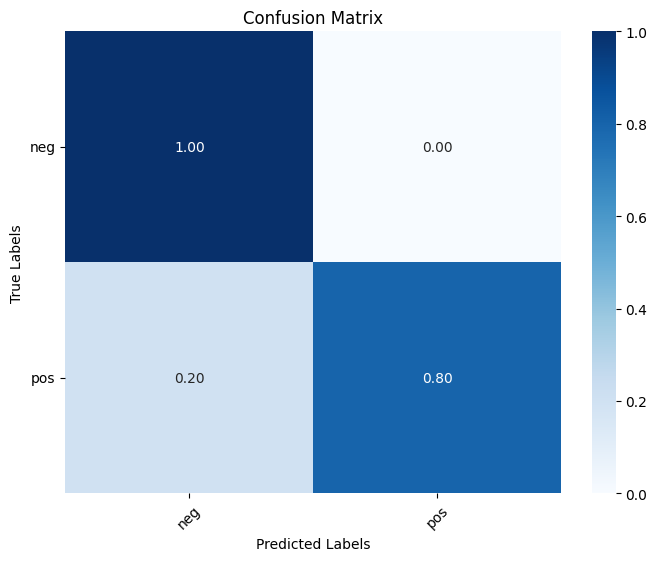

In [211]:
#  Generate the confusion matrix
cm = confusion_matrix(val_labels, val_predictions,normalize='true')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
ax= sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
# Ensure x-labels are vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Ensure y-labels are horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [212]:
# log the Confusion Matrix to Wandb
wandb.log({"conf_mat": wandb.plot.confusion_matrix(
    preds=val_predictions, y_true=val_labels,
    class_names=['neg', 'pos'])})


In [213]:
wandb.finish()


eval/loss,█▇▂▁
eval/runtime,▂▄█▁
eval/samples_per_second,▇▅▁█
eval/steps_per_second,▇▅▁█
train/epoch,▁▁███▁▁███
train/global_step,▁▁███▁▁████
train/learning_rate,█▁█▁
train/loss,█▁▆▃
train/total_flos,▁▁
train/train_loss,█▁
train/train_runtime,█▁


### <font color = 'pickle'> **Check the best saved model**</font>


In [214]:
# After training, let us check the best checkpoint
# We need this for Predioctions and Evaluations
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")


The best model was saved at step 2.


#  <font color = 'pickle'> **Inference**

## <font color = 'pickle'> **Test Set Evaluation**


In [217]:
from torch.utils.data import DataLoader
path = 'checkpoint-'+ str(best_model_checkpoint_step)
checkpoint = str(model_folder/path)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)


In [218]:
model.config

BertConfig {
  "_name_or_path": "/content/drive/MyDrive/data/models/nlp_fall_2023/imdb/bert/checkpoint-2",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "neg",
    "1": "pos"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "neg": 0,
    "pos": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "torch_dtype": "float32",
  "transformers_version": "4.35.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [219]:
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
collate_fn = partial(collate_function, tokenizer = tokenizer, max_length =512, stride=100)
test_laoder = DataLoader(test_split_small, batch_size=5, collate_fn=collate_fn)

In [220]:
for x in test_laoder:
    print(x['input_ids'].shape)
    print(x['labels'].shape)
    print(x['doc_labels'].shape)
    print(x.keys())
    print(x['overflow_to_sample_mapping'])


torch.Size([10, 512])
torch.Size([10])
torch.Size([5])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'overflow_to_sample_mapping', 'labels', 'doc_labels'])
tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])
torch.Size([10, 512])
torch.Size([10])
torch.Size([5])
dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'overflow_to_sample_mapping', 'labels', 'doc_labels'])
tensor([0, 0, 1, 1, 2, 2, 3, 3, 4, 4])


In [221]:
test_accuracy = evaluate_model(test_laoder, model)


In [222]:
test_accuracy

0.2

In [223]:
from transformers import Pipeline

class LongDocumentClassificationPipeline(Pipeline):

    def __init__(self, *args, max_length=512, stride=100, aggregation_method='average_log_probs', **kwargs):
        self.max_length = max_length
        self.stride = stride
        self.aggregation_method = aggregation_method
        super().__init__(*args, **kwargs)

    def __call__(self, documents=None, **kwargs):

        if isinstance(documents, str):
            documents = [{'text': str(documents)}]
        elif isinstance(documents, list) and all(isinstance(doc, str) for doc in documents):
            documents = [{'text': doc} for doc in documents]

        elif isinstance(documents, list) and all(isinstance(doc, dict) and 'text' in doc for doc in documents):
            # Input is already in the expected format, no action needed.
            pass

        # If the input doesn't match any of the above types, raise an error.
        else:
            raise TypeError("Input not supported. Expected a string, a list of strings, or a list of dicts with a 'text' key.")
        # Debug: print the type and content of documents before calling the parent method


        return super().__call__(inputs=[documents], **kwargs)

    def _sanitize_parameters(self, **kwargs):
      # Update kwargs with max_length, stride, and aggregation_method if provided
        self.max_length = kwargs.pop('max_length', self.max_length)
        self.stride = kwargs.pop('stride', self.stride)
        self.aggregation_method = kwargs.pop('aggregation_method', self.aggregation_method)
        return kwargs, {}, {}


    def preprocess(self, inputs=None):
        # Use the custom collate function to prepare the inputs
        tokenized = collate_function(inputs, tokenizer =self.tokenizer, max_length = self.max_length, stride = self.stride)
        model_inputs = {k: v.to(self.device) for k, v in tokenized.items()}
        return model_inputs

    def _forward(self, model_inputs):
        # Remove keys that are not needed by the model's forward method
        if 'doc_labels' in model_inputs:
            self.doc_labels = model_inputs.pop('doc_labels').cpu().numpy()
        if 'overflow_to_sample_mapping' in model_inputs:
            self.overflow_to_sample_mapping = model_inputs.pop('overflow_to_sample_mapping').cpu().numpy()

        # Call the model's forward method with the cleaned inputs
        self.model = self.model.to(self.device)
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(**model_inputs)

        return outputs

    def postprocess(self, model_outputs, **kwargs):
        logits = model_outputs.logits
        # Convert to numpy and calculate probabilities
        logits = logits.cpu().numpy()  # Ensure logits are on CPU for NumPy operations

        # print("Logits shape:", logits.shape)
        # print("Overflow to sample mapping:", self.overflow_to_sample_mapping)


        aggregated_predictions, scores  = aggregate_predictions(logits, self.aggregation_method, self.overflow_to_sample_mapping)
        # print("Aggregated Predictions:", aggregated_predictions)
        # Convert the aggregated predictions to labels and scores
        results = []
        for (pred, score) in zip(aggregated_predictions, scores):
            # print('preds', pred)
            label_name = self.model.config.id2label[pred]
            # print(self.model.config.id2label)
            # print('label_name', label_name)
            results.append({"label": label_name, "score": score})

        return results


## <font color = 'pickle'> **Predictions -Create pipelne for inference**

###  <font color = 'pickle'> **Prediction for individual or small list of examples**

In [224]:
checkpoint = str(model_folder/'checkpoint-2')
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

custom_pipeline = LongDocumentClassificationPipeline(model = model, tokenizer = tokenizer, device = 0)
sample = test_split_small['text'][0]



In [225]:
preds = custom_pipeline(sample)
preds


[[{'label': 'pos', 'score': 0.5044719134435681}]]

In [226]:
sample = test_split_small['text'][2]
len(sample.split())


470

In [227]:
preds = custom_pipeline(sample)
preds


[[{'label': 'pos', 'score': 0.5072076032387455}]]

In [228]:
preds = custom_pipeline(sample, aggregation_method = "average_probs")
preds

[[{'label': 'pos', 'score': 0.5072150230407715}]]

In [229]:
preds = custom_pipeline(sample, aggregation_method = "max_probs")
preds

[[{'label': 'pos', 'score': 0.5099597}]]

In [230]:
preds = custom_pipeline(sample, aggregation_method = "majority_vote")
preds

[[{'label': 'pos', 'score': 1.0}]]

### <font color = 'pickle'> **Prediction for large dataset**

In [231]:
predictions = custom_pipeline(test_split_small['text'] )


In [232]:
predictions

[[{'label': 'neg', 'score': 0.5},
  {'label': 'pos', 'score': 1.0},
  {'label': 'pos', 'score': 1.0},
  {'label': 'neg', 'score': 1.0},
  {'label': 'pos', 'score': 1.0},
  {'label': 'pos', 'score': 1.0},
  {'label': 'pos', 'score': 1.0},
  {'label': 'neg', 'score': 0.5},
  {'label': 'pos', 'score': 1.0},
  {'label': 'neg', 'score': 0.5}]]

In [233]:
predictions = custom_pipeline(test_split_small['text'], aggregation_method = "average_log_probs" )
predictions

[[{'label': 'pos', 'score': 0.5044719284780029},
  {'label': 'pos', 'score': 0.5206712633638668},
  {'label': 'pos', 'score': 0.5072075730068174},
  {'label': 'neg', 'score': 0.5098006868350115},
  {'label': 'pos', 'score': 0.5423665484868643},
  {'label': 'pos', 'score': 0.5062470780799566},
  {'label': 'pos', 'score': 0.5074532366573492},
  {'label': 'neg', 'score': 0.5049827563497207},
  {'label': 'pos', 'score': 0.5215728482882946},
  {'label': 'neg', 'score': 0.5059285186706792}]]

In [234]:
predictions = custom_pipeline(test_split_small['text'], aggregation_method = "max_probs" )
predictions

[[{'label': 'pos', 'score': 0.5325605},
  {'label': 'pos', 'score': 0.52104974},
  {'label': 'pos', 'score': 0.5099595},
  {'label': 'neg', 'score': 0.5157348},
  {'label': 'pos', 'score': 0.5598053},
  {'label': 'pos', 'score': 0.51247054},
  {'label': 'pos', 'score': 0.51169676},
  {'label': 'neg', 'score': 0.5118639},
  {'label': 'pos', 'score': 0.534524},
  {'label': 'neg', 'score': 0.5124421}]]